# Predicting Housing Prices in Nigerian Real Estate Market

### **Project Overview**

![Alt text](Screenshot%202025-05-24%20103538.png)

**Introduction**<br>
Nigeria’s real estate sector is witnessing rapid growth, driven by its expanding population—over 216 million people—and a rising urbanization rate. Urban hubs like Lagos are experiencing surging demand for housing, highlighting the importance of accurate real estate insights. With projections that the market could exceed $2.4 trillion in value by 2024 [Source](https://www.linkedin.com/posts/nairametrics_nigerias-real-estate-market-expected-to-activity-7226184716788391938-meca#:~:text=The%20Nigerian%20real%20estate%20market,11%20million%20units%20for%202024), stakeholders increasingly require tools to navigate this evolving landscape.<br>

**Problem Statement**<br>
Despite high demand, stakeholders such as developers, investors, and homebuyers face challenges in making informed decisions due to a lack of accessible, data-driven insights. Traditional methods of property valuation are often subjective, inconsistent, or outdated, leading to pricing inefficiencies and mismatches in market expectations.<br>

**Solution Provided**<br>
An analytic approach was applied by collecting, cleaning, and preprocessing housing data from Wazobia Housing listings. Using key property features, a machine learning regression model was developed and evaluated to predict residential property prices. The project delivers price estimations based on housing attributes, alongside visual analytics and performance metrics to support interpretation and validation.

**Project Done by**

Data Analytics Engineer: Victory (HIM)


**Objectives**<br>
1. *Data Cleaning*: Analyze and clean the collected housing dataset.
2. *Forecast Housing Prices:* Build a predictive model to estimate Nigerian house prices using property features.
3. *Model Evaluation:* Assess the model’s performance using the root mean squared error metrics to ensure reliability and generalizability


**Project Scope**<br>
This project focuses exclusively on residential housing listings within Nigeria. Tasks included data cleaning, exploratory data analysis, feature engineering, and building a regression model to predict housing prices. Outputs include visualizations and model evaluation metrics


**Tools and Technologies**
<ul>
<li>Programming Language: Python (Jupyter Notebook)</li>
<li>Data Manipulation: pandas, NumPy</li>
<li>Visualization: Matplotlib, Seaborn</li>
<li>Machine Learning: scikit-learn</li>
</ul>

### Project Phases

### Understanding the dataset

In [2]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")


In [4]:
#read dataset
data = pd.read_excel(r"tesa_unclean.xlsx")
data.head()

,ID,loc,title,bedrom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


In [5]:
#create a copy of the dataset and display basic information about it
df = data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedrom         12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB


In [6]:
df.shape
print("The data has:\n\n","Rows:", df.shape[0],"\n","Columns:", df.shape[1])

The data has:

 Rows: 14000 
 Columns: 7


The collected dataset contains 14000 instances of house type and 7 different attributes;
<ul>
<li>ID</li>
<li>Location</li>
<li>House Type</li>
<li>Number of Bedroom</li>
<li>Number of Bathroom</li>
<li>Number of Parking Space</li>
<li>Prices</li>
</ul>


<b>Renaming Columns for easy Readability</b>

The following columns `loc`, `title`, `bedrom`, and `bathroom` where renamed to `location`, `house_type`, `no_of_bedrooms`, and `no_of_bathrooms` respectively for easier readability.

In [7]:
#rename the columns for better understanding
df.rename(columns={"loc": "location", "title": "house_type", "bedrom": "no_of_bedrooms", "bathroom": "no_of_bathrooms"}, inplace=True)

### Data Investigation

In [8]:
#check for null values
null_counts = df.isnull().sum()
print("Number of null values per column")
null_counts


Number of null values per column


ID                    0
location           1813
house_type         1722
no_of_bedrooms     1799
no_of_bathrooms    1805
parking_space      1811
price                 0
dtype: int64

In [12]:
#check for duplicates
print("No of duplicates:", df.duplicated().sum())

No of duplicates: 0


In [10]:
#check all available statistics
print("Short Statistics of the dataset")
df.describe(include="all")

Short Statistics of the dataset


,ID,location,house_type,no_of_bedrooms,no_of_bathrooms,parking_space,price
count,14000.000000,12187,12278,12201.000000,12195.000000,12189.000000,1.400000e+04
unique,NaN,36,10,NaN,NaN,NaN,NaN
top,NaN,Kadna,Flat,NaN,NaN,NaN,NaN
freq,NaN,370,1372,NaN,NaN,NaN,NaN
mean,4862.700357,NaN,NaN,4.308171,3.134235,3.169825,2.138082e+06
std,3818.348214,NaN,NaN,2.441165,2.035950,1.599415,1.083057e+06
min,0.000000,NaN,NaN,1.000000,1.000000,1.000000,4.319673e+05
25%,1672.750000,NaN,NaN,2.000000,1.000000,2.000000,1.393990e+06
50%,3527.000000,NaN,NaN,4.000000,2.000000,3.000000,1.895223e+06
75%,8011.250000,NaN,NaN,6.000000,5.000000,4.000000,2.586699e+06


From the table, it was seen that
- Prices ranged from 432,000 to 16.56 million, with 75% having a max price of 2.6 million.
- Bedrooms: Mostly between 2–6
- Bathrooms: Mostly between 1–5


In [13]:
#checking the values in house type
df["house_type"].value_counts().sort_values(ascending=False)

house_type
Flat                    1372
Apartment               1331
Townhouse               1327
Mansion                 1322
Detached duplex         1312
Penthouse               1306
Semi-detached duplex    1299
Bungalow                1293
Terrace duplex          1266
Cottage                  450
Name: count, dtype: int64

In [14]:
#checking the values in location
df["location"].value_counts().sort_values(ascending=False)

location
Kadna          370
Anambra        363
Benue          355
Yobe           353
Kano           351
Borno          351
Nasarawa       349
Cross River    349
Imo            348
Zamfara        348
Ebonyi         346
Kebbi          346
Katsina        345
Ogun           345
Ondo           344
Gombe          343
Bauchi         342
Oyo            341
Adamawa        341
Bayelsa        340
Plateau        338
Osun           338
Jigawa         337
Ekiti          336
Kwara          333
Niger          330
Akwa Ibom      329
Lagos          328
Sokoto         326
Delta          325
Enugu          324
Rivers         323
Kogi           321
Taraba         315
Abia           312
Edo            302
Name: count, dtype: int64

From above, the following problems where detected:
<ol>
<li>Incorrect Datatypes: some columns were not properly represented in the correct datatypes.</li>
<li>Wrong Spelling: The states where seen to be states in nigeria, which was then used to tell that kaduna was missed spelt as Kadna</li>
<li>Missing Data: the columns location, house_type, no_of_bedrom, no_of_bathroom, parking_space has null values.</li>
<li>Outliers: The price column showed extreme values above the 75% percentile.</li>
</ol>

### Data Cleaning

#### 1. Incorrect Datatypes

To correct the datatypes, the following were done:

<ul>
<li>The ID column was changed to string</li>
<li>The no_of_bedroom, no_of_bathroom and parking_space columns were changed to integer because you can't have half value of them</li></ul>

In [15]:
# Change the dtypes of the columns with wrong datatypes
df["ID"] = df["ID"].astype(str)
df["no_of_bedrooms"] = df["no_of_bedrooms"].astype("Int64")
df["no_of_bathrooms"] = df["no_of_bathrooms"].astype("Int64")
df["parking_space"] = df["parking_space"].astype("Int64")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               14000 non-null  object 
 1   location         12187 non-null  object 
 2   house_type       12278 non-null  object 
 3   no_of_bedrooms   12201 non-null  Int64  
 4   no_of_bathrooms  12195 non-null  Int64  
 5   parking_space    12189 non-null  Int64  
 6   price            14000 non-null  float64
dtypes: Int64(3), float64(1), object(3)
memory usage: 806.8+ KB


#### 2. Wrong Spelling

The incorrect spelling in the title column - "Kadna" was replaced with "Kaduna"

In [16]:
#replace Kadna with Kaduna
df.replace("Kadna", "Kaduna", inplace=True)

In [17]:
df.head(20)

,ID,location,house_type,no_of_bedrooms,no_of_bathrooms,parking_space,price
0,3583,Katsina,Semi-detached duplex,2,2,1,1149999.565
1,2748,Ondo,Apartment,<NA>,2,4,1672416.689
2,9261,Ekiti,NaN,7,5,<NA>,3364799.814
3,2224,Anambra,Detached duplex,5,2,4,2410306.756
4,10300,Kogi,Terrace duplex,<NA>,5,6,2600700.898
5,1733,Borno,Mansion,<NA>,1,3,1341750.867
6,7892,Kwara,Bungalow,<NA>,4,4,2125789.778
7,3003,Katsina,Penthouse,3,3,5,2043107.592
8,555,Osun,Semi-detached duplex,<NA>,1,2,1219453.877
9,3085,Kaduna,Penthouse,<NA>,3,3,2710664.872


#### 3. Missing Data

##### Exploratory Analysis

Firstly, inorder to be able to select the values to replace the missing values, an exploratory analysis will be done to discover relationship between columns.

In [18]:
numeric_cols = ['no_of_bedrooms', 'no_of_bathrooms', 'parking_space', 'price']
df.groupby(by=["house_type"])[numeric_cols].mean().sort_values(by=["price"], ascending=False)

,no_of_bedrooms,no_of_bathrooms,parking_space,price
house_type,,,,
Mansion,4.333929,3.19788,3.115114,3.725768e+06
Penthouse,4.342982,2.986667,3.225177,2.628945e+06
Detached duplex,4.32784,3.23227,3.230906,2.205883e+06
Townhouse,4.298759,3.165789,3.175454,2.056125e+06
Terrace duplex,4.340639,3.292616,3.178505,1.927270e+06
Semi-detached duplex,4.414903,3.19477,3.202912,1.918468e+06
Bungalow,4.402852,3.394664,3.192619,1.733845e+06
Flat,4.378877,3.188295,3.146486,1.721875e+06
Apartment,4.344219,3.109862,3.285714,1.567004e+06


Based on the price grouping, mansions stand out as the most expensive properties, averaging close to `N4 million`.<br> Following closely are penthouses, priced at over `N2.6 million`, and detached duplexes, which typically cost more than `N2 million`.<br> On the more affordable end, flats average `N1.7 million`, apartments come in at `N1.6 million`, while cottages are the least expensive, costing around `N1.3 million`.
<br>Also from this table we can deduce that house type is a big factor for prices of the house
<br>To further justify this findings below is a chart showing the graphical relationship between `House_type` and `Price

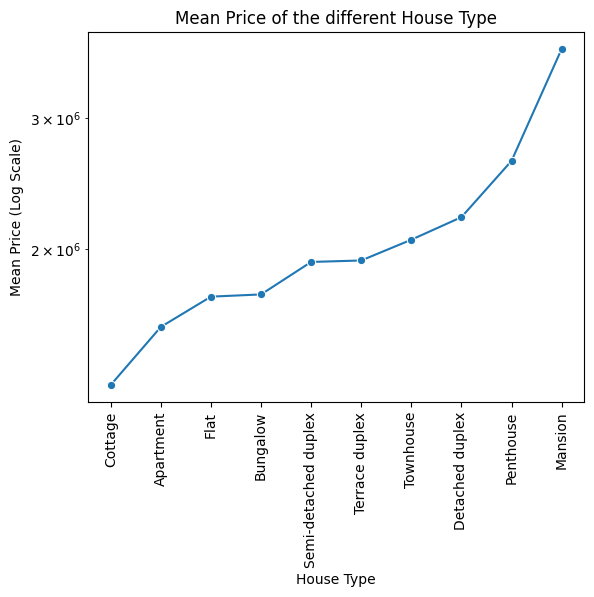

In [ ]:
# relationship between price and the house types
order_house = df.groupby("house_type")["price"].mean().sort_values().index

# Compute mean price per house_type and sort by order_house
mean_price_by_type = df.groupby("house_type", as_index=False)["price"].mean()
mean_price_by_type = mean_price_by_type.set_index("house_type").loc[order_house].reset_index()

sns.lineplot(data=mean_price_by_type, x="house_type", y="price", marker="o")
plt.xlabel("House Type")
plt.ylabel("Mean Price (Log Scale)")
plt.title("Mean Price of the different House Type")
plt.yscale("log")
plt.xticks(rotation=90)
plt.show()

House types like Apartments, Flats, and Bungalows has lower prices, while Penthouses and Mansions have significantly higher prices.

The price column can be seen to vary with the type of houses, with mansion and penthouse having high mean price of houses compared to the rest

**Addressing Location column**
Checking the relationship between location and price

In [26]:
df["location"].value_counts().sort_values(ascending=False)

location
Kaduna         370
Anambra        363
Benue          355
Yobe           353
Kano           351
Borno          351
Nasarawa       349
Cross River    349
Imo            348
Zamfara        348
Ebonyi         346
Kebbi          346
Katsina        345
Ogun           345
Ondo           344
Gombe          343
Bauchi         342
Oyo            341
Adamawa        341
Bayelsa        340
Plateau        338
Osun           338
Jigawa         337
Ekiti          336
Kwara          333
Niger          330
Akwa Ibom      329
Lagos          328
Sokoto         326
Delta          325
Enugu          324
Rivers         323
Kogi           321
Taraba         315
Abia           312
Edo            302
Name: count, dtype: int64

In [28]:
df.groupby(by=["location"])[numeric_cols].mean().sort_values(by=["price"], ascending=False)    

,no_of_bedrooms,no_of_bathrooms,parking_space,price
location,,,,
Lagos,4.320557,3.090301,3.042857,4.210546e+06
Bayelsa,4.42953,3.231293,3.044068,3.112322e+06
Rivers,4.293706,3.240143,3.196364,2.957098e+06
Akwa Ibom,4.275261,3.090592,3.142349,2.725454e+06
Delta,4.197802,3.119718,3.135714,2.712493e+06
Ogun,4.366667,3.03125,3.135889,2.564020e+06
Cross River,4.496667,3.124567,3.118644,2.507765e+06
Anambra,4.078689,3.058065,3.279365,2.337230e+06
Edo,4.351351,3.153846,3.386364,2.310452e+06


## VISUALISATION

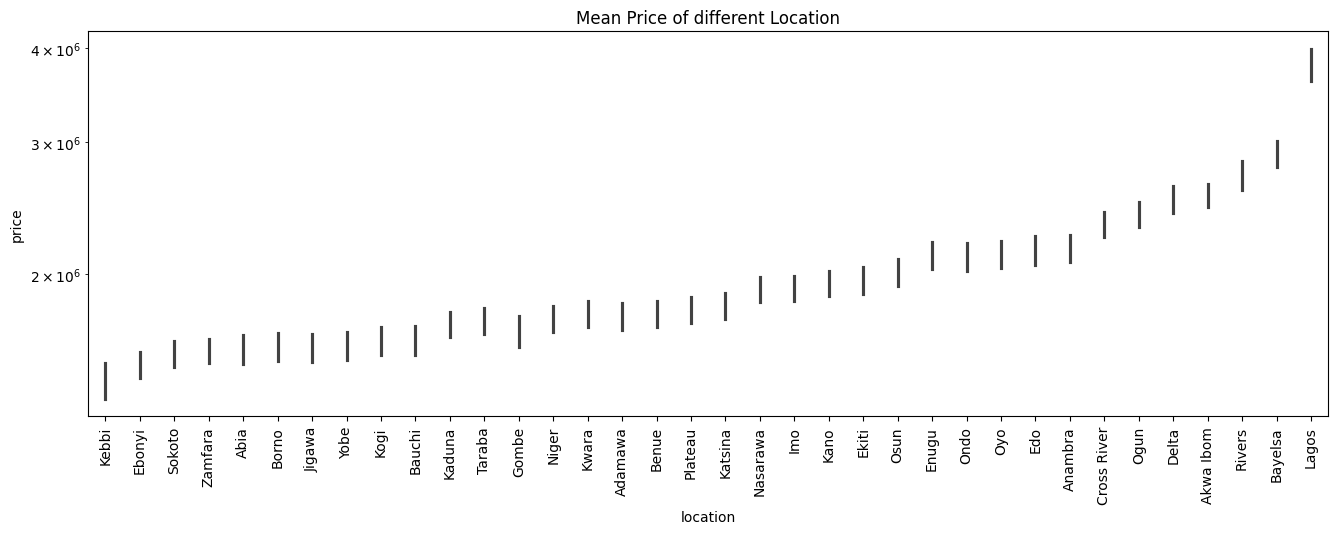

In [29]:
#relationship between the location and price
plt.figure(figsize=(16, 5))
order_location = df.groupby("location")["price"].mean().sort_values().index

sns.barplot(data=df, x="location", y="price", order= order_location, log_scale=True)
plt.title("Mean Price of different Location")
plt.xticks(rotation=90)
plt.show()

From the plot, it is evident that the mean prices for most locations are very close to each other, with only a few locations (such as Lagos and Bayelsa) showing distinctly higher mean prices. This small difference in mean prices across the majority of locations means that using price alone to infer or fill missing values in the location column would be unreliable. Since properties in different locations can have similar prices, price does not provide enough discriminatory power to accurately predict the correct location for missing values. Therefore, price is not a suitable feature for imputing missing values in the location column.

**Adressing the missing values in bedroom, bathrooms, and parking space**

Checking correlation between no of bedrooms, no of bathrooms, parking space and price

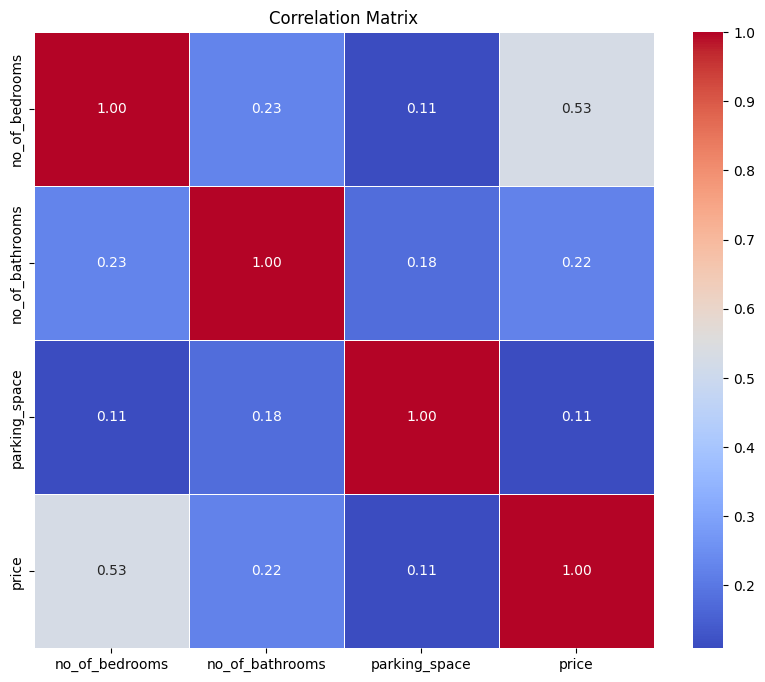

In [30]:
#correlation relation between the numerical values
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

**Insights from the plot:**
- There is a moderate positive correlation between the number of bedrooms and house price, indicating that houses with more bedrooms tend to be more expensive.
- The number of bathrooms shows weak positive correlation with no. of bedrooms, parking space and price.
- The strongest relationship observed is between `no_of_bedrooms` and `price`.

Overall, the matrix highlights that house size (as measured by bedrooms and bathrooms) is a key driver of price in this dataset.


**DETECTING RELATIONSHIP PATTERNS FOR BEDROOMS**

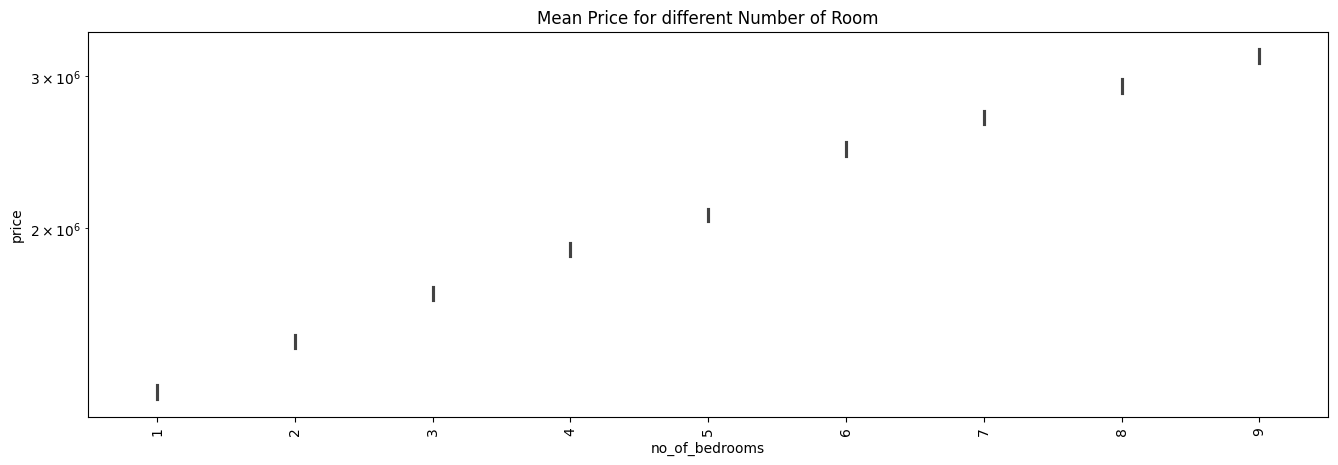

In [31]:
#relationship between the no of bedrooms and price
plt.figure(figsize=(16, 5))

sns.barplot(data=df[df['no_of_bedrooms'].notna()], x="no_of_bedrooms", y="price", log_scale=True)
plt.title("Mean Price for different Number of Room")
plt.xticks(rotation=90)
plt.show()

The plot potrays the linear correlation between no of bedrooms and price. It demonstrates a clear positive linear relationship: as the number of bedrooms increases, the mean price also increases. <br>This indicates that properties with more bedrooms tend to be more expensive.

<Axes: xlabel='no_of_bedrooms', ylabel='house_type'>

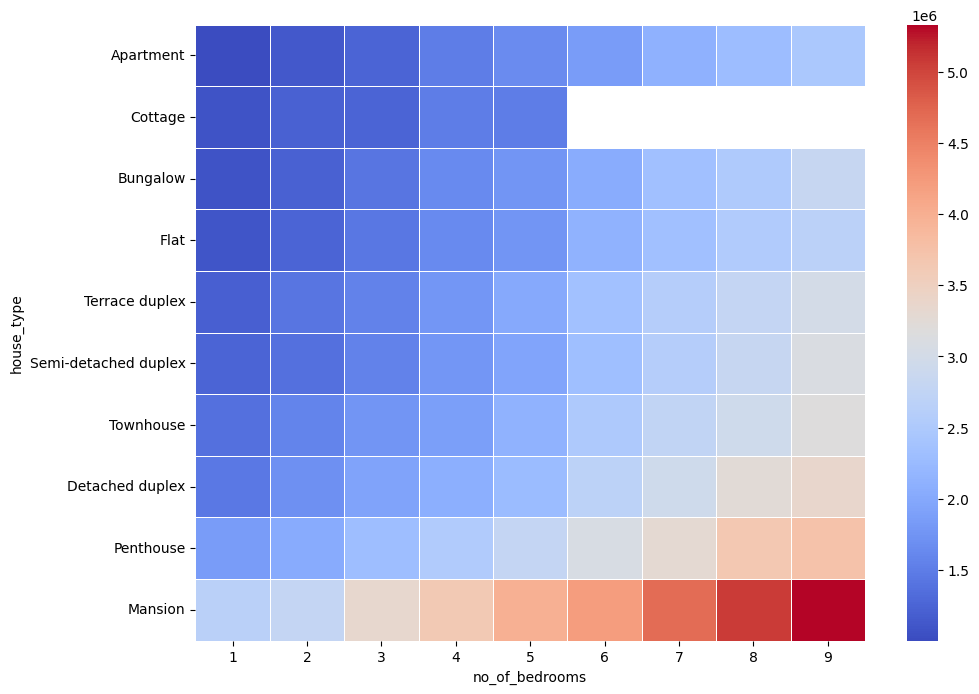

In [32]:
pivot = df.pivot_table(index='house_type', columns="no_of_bedrooms", values="price", aggfunc="mean")
pivot.sort_values(by=1, inplace=True)

# Set figure size based on number of house types/no_of_bedrooms
fig_width = max(8, pivot.shape[1] * 1.2)
fig_height = max(6, pivot.shape[0] * 0.8)

# Plot heatmap
plt.figure(figsize=(fig_width, fig_height))
sns.heatmap(pivot, fmt=".1f", linewidths=0.5, cmap="coolwarm")

Combining addition attributes of the dataset, the chart shows the average price of houses by house type and number of bedrooms.

**Insights from the chart:**
- The mean price increases as the number of bedrooms increases
- Also, the mean price increases for the variation of the different house type, in a particular order.
- The heatmap highlights that both house type and number of bedrooms are strong determinants of property price, insinuating that the price can be used to infer the no of bedrooms in a particular house type.

**DETECTING RELATIONSHIP PATTERNS FOR BATHROOMS**

In [19]:
df["no_of_bathrooms"].value_counts()

no_of_bathrooms
1    3272
2    3255
7    1156
5    1143
6    1138
3    1119
4    1112
Name: count, dtype: Int64

Majority of the house can be seen to have 1-2 no of bathrooms and from the table, which shows a large gap in the price difference between houses with number of bathroom 1-2 and that of 3-7. Let't examine the relationship between house type and the no of bathrooms

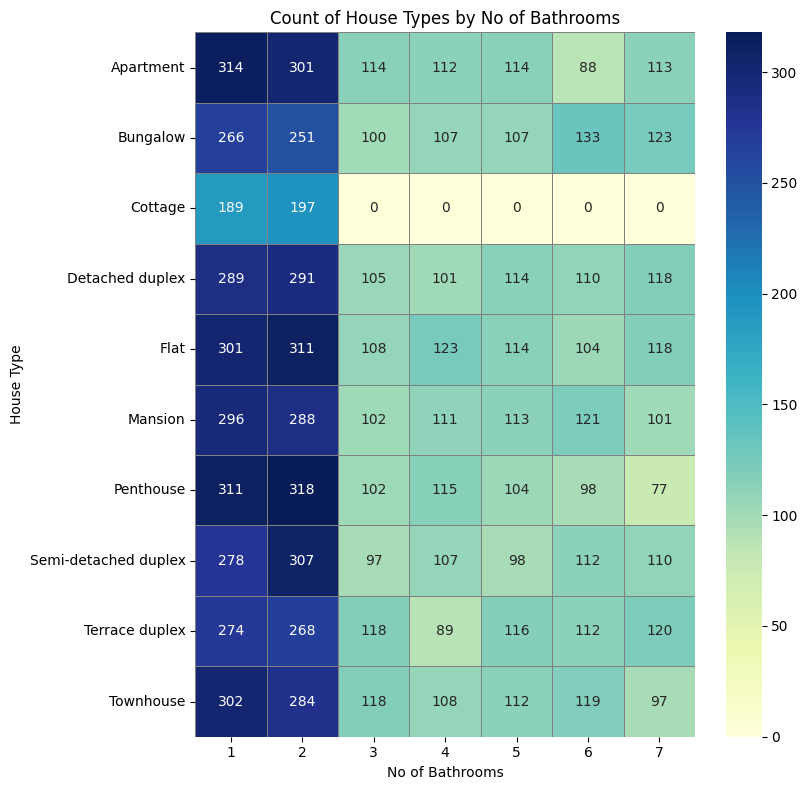

In [20]:
# Crosstab: rows = house type, columns = no of bathrooms
ct = pd.crosstab(df["house_type"], df["no_of_bathrooms"])

# Set figure size based on number of house types/no_of_bathrooms
fig_width = max(8, ct.shape[1] * 1.2)
fig_height = max(6, ct.shape[0] * 0.8)

# Plot heatmap
plt.figure(figsize=(fig_width, fig_height))
sns.heatmap(ct, annot=True, fmt="d", cmap="YlGnBu", linewidths=0.5, linecolor='gray')
plt.title("Count of House Types by No of Bathrooms")
plt.xlabel("No of Bathrooms")
plt.ylabel("House Type")
plt.yticks(rotation=0)  # Keep House type labels horizontal
plt.tight_layout()
plt.show()

Firstly, the plot was used to check if the type of house can be used to determing the no of bathrooms in the house, but the result shows that a high percentage of all house types has no of bathroom between 1 and 2. Further investigation was done to check for instace mansion, why this were occuring

In [21]:
df_1 = df[(df["house_type"] == "Mansion")]
df_1[df_1["no_of_bathrooms"].isin([1,2])].describe(include="all")

,ID,location,house_type,no_of_bedrooms,no_of_bathrooms,parking_space,price
count,584,491,584,479.0,584.0,493.0,5.840000e+02
unique,569,36,1,<NA>,<NA>,<NA>,NaN
top,2502,Katsina,Mansion,<NA>,<NA>,<NA>,NaN
freq,2,21,584,<NA>,<NA>,<NA>,NaN
mean,NaN,NaN,NaN,3.812109,1.493151,2.823529,3.406484e+06
std,NaN,NaN,NaN,2.194082,0.500382,1.406754,1.828701e+06
min,NaN,NaN,NaN,1.0,1.0,1.0,7.376550e+05
25%,NaN,NaN,NaN,2.0,1.0,2.0,2.098774e+06
50%,NaN,NaN,NaN,4.0,1.0,3.0,3.230189e+06
75%,NaN,NaN,NaN,5.0,2.0,4.0,4.227536e+06


Considering the statistical analysis, a definite explanation can't be deduced as to why the number of bathrooms is mostly between 1 and 2 even for Mansions,  because the no of bedrooms, parking space and price has similar statistics to the entire dataset.

To investigate further, let's considered the possibility that the number of bedrooms where interchanged with number of bathrooms and the House type that falls within that range, also set a range that a house can only have at most 3 more bathrooms than bedrooms.

In [22]:
((df["no_of_bathrooms"] > df["no_of_bedrooms"])).sum()

np.int64(2645)

In [23]:
#checking the house type, setting a threshold of 3 for the accepted difference between bathrooms and bedrooms
df[((df["no_of_bathrooms"] - df["no_of_bedrooms"]) > 3)].describe(include="all")

,ID,location,house_type,no_of_bedrooms,no_of_bathrooms,parking_space,price
count,671,562,577,671.0,671.0,549.0,6.710000e+02
unique,671,36,9,<NA>,<NA>,<NA>,NaN
top,12222,Jigawa,Bungalow,<NA>,<NA>,<NA>,NaN
freq,1,22,79,<NA>,<NA>,<NA>,NaN
mean,NaN,NaN,NaN,1.661699,6.341282,3.499089,1.695124e+06
std,NaN,NaN,NaN,0.753307,0.749972,1.698674,6.561913e+05
min,NaN,NaN,NaN,1.0,5.0,1.0,8.515465e+05
25%,NaN,NaN,NaN,1.0,6.0,2.0,1.250617e+06
50%,NaN,NaN,NaN,1.0,7.0,3.0,1.518814e+06
75%,NaN,NaN,NaN,2.0,7.0,5.0,1.967604e+06


Although, this hypothesis was incorrect, these instances were seen as been incorrect, so there were latter flag as anomaly.

To further find relation between no of bathroom and other columns, let's examine the relationship between no of bathrooms and price


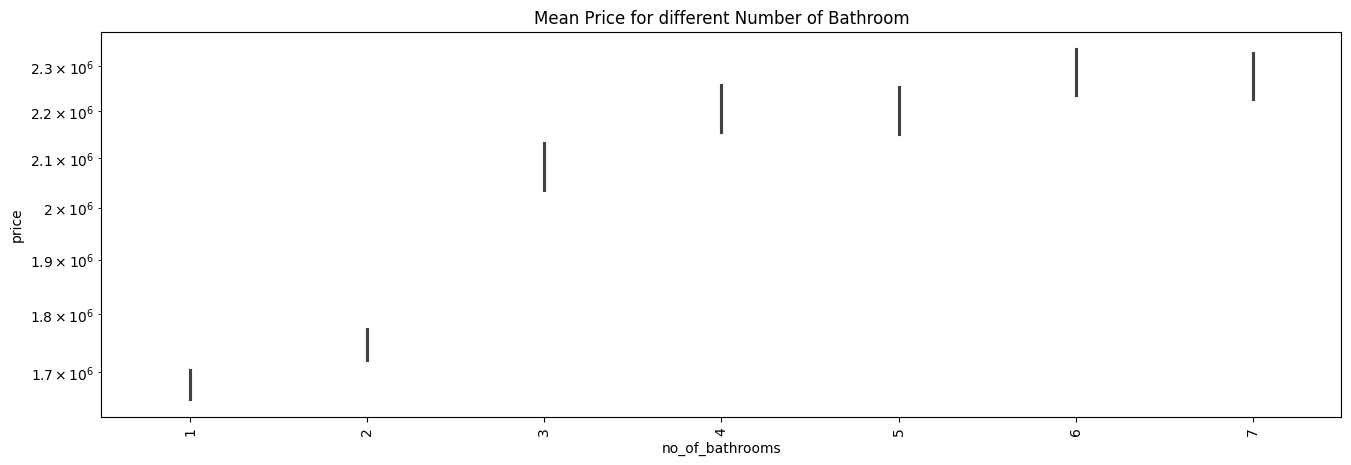

In [24]:
#relationship between the location and price
plt.figure(figsize=(16, 5))

sns.barplot(data=df[df['no_of_bathrooms'].notna()], x="no_of_bathrooms", y="price", log_scale=True)
plt.title("Mean Price for different Number of Bathroom")
plt.xticks(rotation=90)
plt.show()

The plot illustrates the relationship between the number of bathrooms and the mean price of houses. While there is a general trend that houses with more bathrooms tend to have higher prices, the price ranges for different bathroom counts overlap significantly. For example, some houses with only 1 or 2 bathrooms can have prices similar each other, while houses with 4, 5, 6, 7 no of bathrooms can also have similar prices.

This overlap indicates that price alone is not a reliable predictor of the number of bathrooms. Other factors—such as house type, number of bedrooms, and location can also influence the price. Therefore, using only the price to impute or infer the number of bathrooms would likely result in inaccurate or misleading values. A more robust approach should consider multiple features in combination to better capture the underlying relationships in the data.



<Axes: xlabel='no_of_bedrooms', ylabel='no_of_bathrooms'>

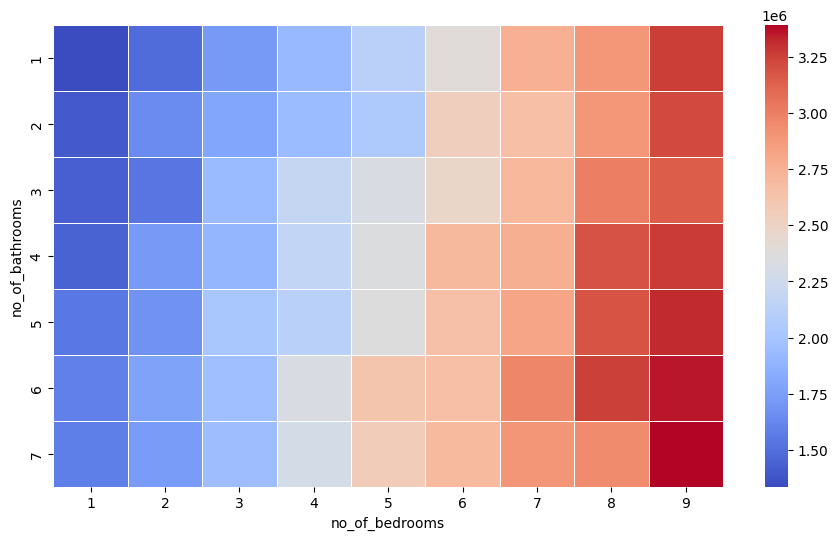

In [25]:
pivot = df.pivot_table(index='no_of_bathrooms', columns="no_of_bedrooms", values="price", aggfunc="mean")

# Set figure size based on number of house types/no_of_bathrooms
fig_width = max(8, pivot.shape[1] * 1.2)
fig_height = max(6, pivot.shape[0] * 0.8)

# Plot heatmap
plt.figure(figsize=(fig_width, fig_height))
sns.heatmap(pivot, fmt=".1f", linewidths=0.5, cmap="coolwarm")

The chart shows the average price of houses by number of bathrooms and number of bedrooms, to show that combining another attribute with price, can properly determine the no of bedrooms a house has.

Based on the heatmap, the mean price can be seen to increase as the no of bedroom increase, which also varies with the number of bathrooms. These displays a progression that houses with lower bedroom and lower price also have lower bathroom and vise versa. Which shows that no of bedrooms and price can be used to determine the no of bathrooms in a particular house

<b>DETECTING RELATIONSHIP PATTERNS FOR PARKING SPACE </b>

In [26]:
#Count of house types with the following number of parking spaces.
df.parking_space.value_counts()

parking_space
4    2419
2    2394
3    2378
1    2324
6    1345
5    1329
Name: count, dtype: Int64

To determine the variable that has a relationship with parking space, the relationship between Price and parking space was first examined.

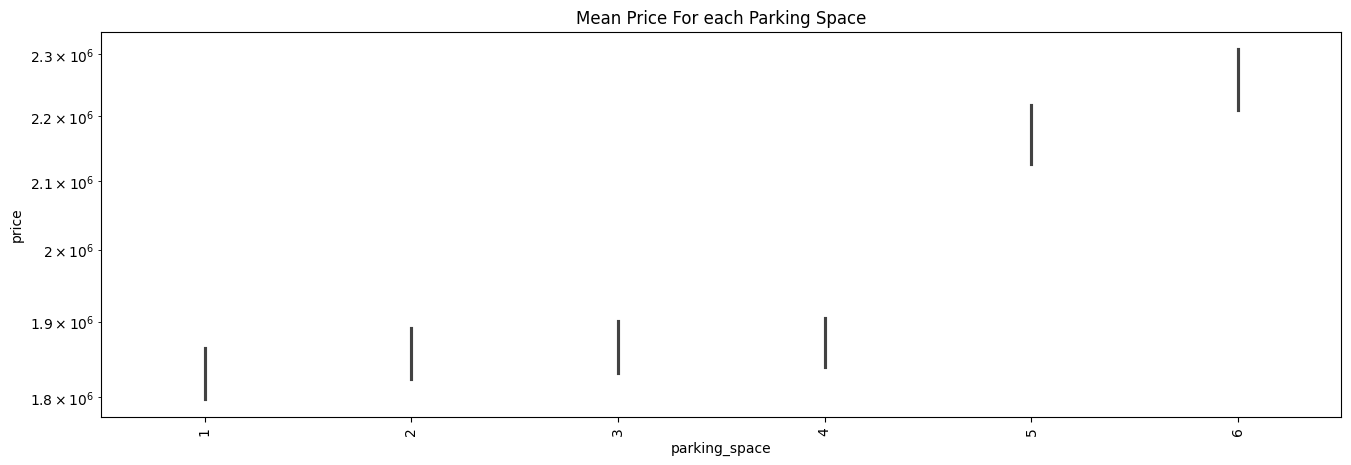

In [27]:
#relationship between the Parking Space and price
plt.figure(figsize=(16, 5))

sns.barplot(data=df[df["parking_space"].notna()], x="parking_space", y="price", log_scale=True)
plt.title("Mean Price For each Parking Space")
plt.xticks(rotation=90)
plt.show()

The chart shows that houses with parking space ranging from 1-4 has little to no difference between the price of the house, also for 5-6 parking space, there is a spike in price compared to 1-4.

This relationship does not tell much about the relationship , so therefore inference can't be made with only prices for the parking space. Let's combine the house type with parking space and price

<Axes: xlabel='parking_space', ylabel='house_type'>

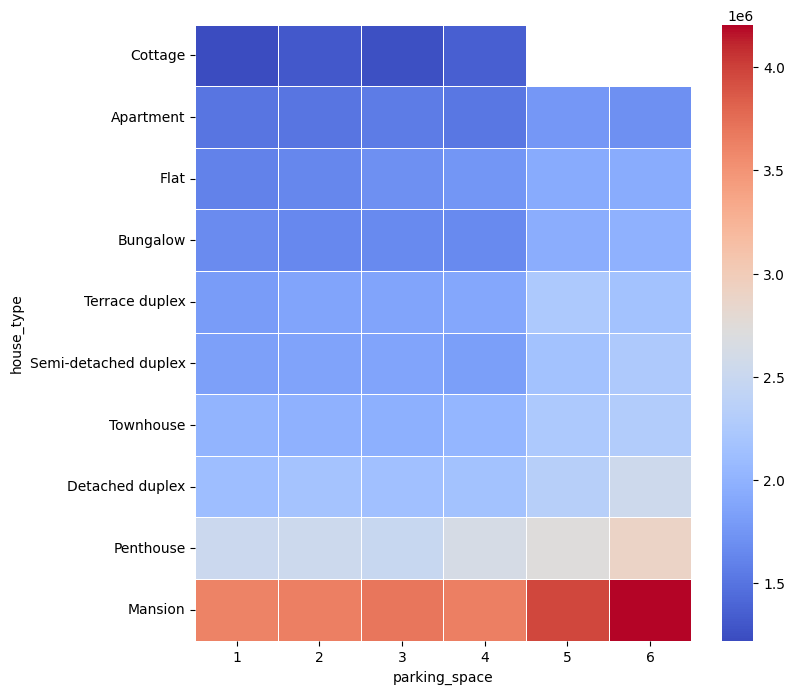

In [28]:
pivot = df.pivot_table(index="house_type", columns="parking_space", values="price", aggfunc="mean")
pivot.sort_values(by=1, inplace=True)
# Set figure size based on number of parking_spaces/no_of_bedrooms
fig_width = max(8, pivot.shape[1] * 1.2)
fig_height = max(6, pivot.shape[0] * 0.8)

# Plot heatmap
plt.figure(figsize=(fig_width, fig_height))
sns.heatmap(pivot, fmt=".1f", linewidths=0.5, cmap="coolwarm")

The chart shows the average price of houses by house type and parking space.

Based on the heatmap it is can be seen that increase in the no of parking space increases with the mean price for different house types. Thereby, informing that the house type and price can be used to determine the no of parking space.


**SUMMARY OF FINDINGS**

From the analysis, the following approach can be taken to replace missing values:
<ul>
<li>Based on the relationship between the price and house type, the type of house can be inferred using the price.</li>
<li>A large variation between the price of houses in lagos and other location, but no significant difference for other location, so therefore the missing location can be replaced with unknown.</li>
<li>The price column can be used to determine the missing no_of_bedrooms, because a strong positive correlation was seen between the no_of_bedrooms and price. Also house type can be included, because a more progressive relationship was seen between house type, no of bathroom and price.</li>
<li>Furthermore, there is a relationship between no of bedrooms, no of bathrooms and price. Therefore this relationship can be used to determine the missing value for the no of bathrooms columns, using no of  bedrooms and price.</li>
<li>Lastly, the dataset was seen to show high difference in price between the house that had 5 and 6 parking space to those that had 1-4 parking space, while also exploring with the house type, there is a proportionality with price for the parking space</li>
</ul>

##### Filling Missing Values

In [29]:
#function to infer missing values in a target col based on the closest median price
def infer_missing_categories(df, target_col, reference_col='price'):
    """
    Infers missing values in a categorical column based on a numerical reference column.

    Parameters:
        df (pd.DataFrame): The input DataFrame
        target_col (str): The categorical column with missing values (e.g., 'no_of_bedrooms')
        reference_col (str): The numeric column used for inference (default is 'price')

    Returns:
        pd.DataFrame: The updated DataFrame with missing target_col values filled
    """

    # Split data into null and non-null parts
    df_nulls = df[df[target_col].isnull()]
    df_complete = df[df[target_col].notnull()]

    # Convert target_col to string to avoid dtype issues (if needed)
    df_complete[target_col] = df_complete[target_col].astype(str)

    # Group by the target column and compute mean, median, std of reference column
    grouped = df_complete.groupby(target_col)[reference_col].agg(
        mean_val='mean',
        median_val='median',
        std_val='std'
    )

    # Compute bounds
    grouped['lower_bound'] = grouped['mean_val'] - grouped['std_val']
    grouped['upper_bound'] = grouped['mean_val'] + grouped['std_val']
    grouped.reset_index(inplace=True)


    # Define inference function
    def infer_value(ref_val):
        in_bounds = grouped[
            (grouped['lower_bound'] <= ref_val) & (ref_val <= grouped['upper_bound'])
        ]
        if not in_bounds.empty:
            closest = in_bounds.iloc[(in_bounds['median_val'] - ref_val).abs().argmin()]
            return closest[target_col]

        # If no in-bound match, find the closest boundary
        grouped['boundary_distance'] = grouped.apply(
            lambda row: min(abs(ref_val - row['lower_bound']), abs(ref_val - row['upper_bound'])),
            axis=1
        )
        closest_boundary = grouped.loc[grouped['boundary_distance'].idxmin()]
        return closest_boundary[target_col]

    # Apply inference to null values
    df[target_col] = df.apply(
        lambda row: infer_value(row[reference_col]) if pd.isnull(row[target_col]) else row[target_col],
        axis=1
    )

    return df


<b>House Type column:</b> To handle the missing data in the house_type column, the price column where used by doing the following;
<ol>
<li>Rows with non null values in the house_type columns were extracted.</li>
<li>The extracted dataset was then grouped by house_type, calculating the mean, median and std prices. Also a lower and upper price boundary was set using the mean and std.</li>
<li>The price of rows with missing house_type values were then compared with the boundaries of all available house_type values, and the house_type value was predicted as the one with the closest median price.</li>
<li>For prices that falls outside the boundaries of all house_type values the closest boundary house_type was used.</li>
</ol>

In [30]:
# Or infer missing 'house_type' from 'price', etc.
df = infer_missing_categories(df, target_col='house_type', reference_col='price')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               14000 non-null  object 
 1   location         12187 non-null  object 
 2   house_type       14000 non-null  object 
 3   no_of_bedrooms   12201 non-null  Int64  
 4   no_of_bathrooms  12195 non-null  Int64  
 5   parking_space    12189 non-null  Int64  
 6   price            14000 non-null  float64
dtypes: Int64(3), float64(1), object(3)
memory usage: 806.8+ KB


<b>Bedrooms Column and Parking Space Column:</b> To handle the missing column in the no of bedroom and parking space columns;
<ol>
<li>The dataframe was first divided into sub dataframe for each house types.</li>
<li>Rows with non null values in the no_of_bedrooms columns were extracted.</li>
<li>The extracted dataset was then grouped by no_of_bedroom, calculating the mean, median and std prices. Also a lower and upper price boundary was set using the mean and std.</li>
<li>The price of rows with missing no_of_bedroom values were then compared with the boundaries of all available no_of_bedroom values, and the no_of_bedroom value was predicted as the one with the closest median price.</li>
<li>For prices that falls outside the boundaries of all no_of_bedroom values the closest boundary no_of_bedroom was used.</li>
<li>The above process from 2 - 5 was then repeated for parking space column</l>
</ol>

In [31]:
binned_df = {}

df_clean = df.reset_index()

house_types = list(df.house_type.unique())

for house_type in house_types:
  binned_df[house_type] = df_clean[df_clean["house_type"] == house_type]


cleaned_binned_df = {}
for k, v in binned_df.items():
  #inferring for number of bedrooms
  v = infer_missing_categories(v, target_col='no_of_bedrooms', reference_col='price')
  v["no_of_bedrooms"] = pd.to_numeric(v["no_of_bedrooms"])
  #inferring for number of parking_space
  v = infer_missing_categories(v, target_col='parking_space', reference_col='price')
  v["parking_space"] = pd.to_numeric(v["parking_space"])



  cleaned_binned_df[k] = v

In [32]:
df_clean = pd.concat(cleaned_binned_df.values(), ignore_index=True)

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            14000 non-null  int64  
 1   ID               14000 non-null  object 
 2   location         12187 non-null  object 
 3   house_type       14000 non-null  object 
 4   no_of_bedrooms   14000 non-null  int64  
 5   no_of_bathrooms  12195 non-null  Int64  
 6   parking_space    14000 non-null  int64  
 7   price            14000 non-null  float64
dtypes: Int64(1), float64(1), int64(3), object(3)
memory usage: 888.8+ KB


<b>Bathrooms:</b> To handle the missing column in the number of bathrooms column;
<ol>
<li>The dataframe were divided into sub dataframe for each no of bedrooms.</li>
<li>Rows with non null values in the no of bathrooms columns were extracted.</li>
<li>The extracted dataset was then grouped by no of bathrooms, calculating the mean, median and std prices. Also a lower and upper price boundary was set using the mean and std.</li>
<li>The price of rows with missing values were then compared with the boundaries of all available unique values of the no of bathrooms. The missing value was then predicted as the one with the closest median price.</li>
<li>For prices that falls outside the boundaries of all no of bathrooms, the closest boundary value was used.</li>
</ol>

In [33]:
binned_df = {}

no_of_bedrooms = [1, 2, 3, 4, 5, 6, 7, 8, 9]

for no in no_of_bedrooms:
  binned_df[no] = df_clean[df_clean["no_of_bedrooms"] == no]


cleaned_binned_df = {}
for k, v in binned_df.items():
  #inferring for no of bathrooms
  v = infer_missing_categories(v, target_col='no_of_bathrooms', reference_col='price')
  v["no_of_bathrooms"] = pd.to_numeric(v["no_of_bathrooms"])


  cleaned_binned_df[k] = v

In [34]:
df_clean = pd.concat(cleaned_binned_df.values(), ignore_index=True).sort_values(by='index')
df_clean.set_index('index', inplace=True)

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               14000 non-null  object 
 1   location         12187 non-null  object 
 2   house_type       14000 non-null  object 
 3   no_of_bedrooms   14000 non-null  int64  
 4   no_of_bathrooms  14000 non-null  int64  
 5   parking_space    14000 non-null  int64  
 6   price            14000 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 875.0+ KB


<b>Location Columm:</b> The location column missing values were replaced with a default value "Unknown"

In [35]:
df_clean['location'] =  df_clean["location"].fillna("Unknown")

In [36]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               14000 non-null  object 
 1   location         14000 non-null  object 
 2   house_type       14000 non-null  object 
 3   no_of_bedrooms   14000 non-null  int64  
 4   no_of_bathrooms  14000 non-null  int64  
 5   parking_space    14000 non-null  int64  
 6   price            14000 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 875.0+ KB


In [37]:
#saving the clean dataframe
df_clean.to_csv(r"Wazobia_cleaned_out.csv", index=False)

#### 4. Outliers

**Visualization of outliers in prices by house type**

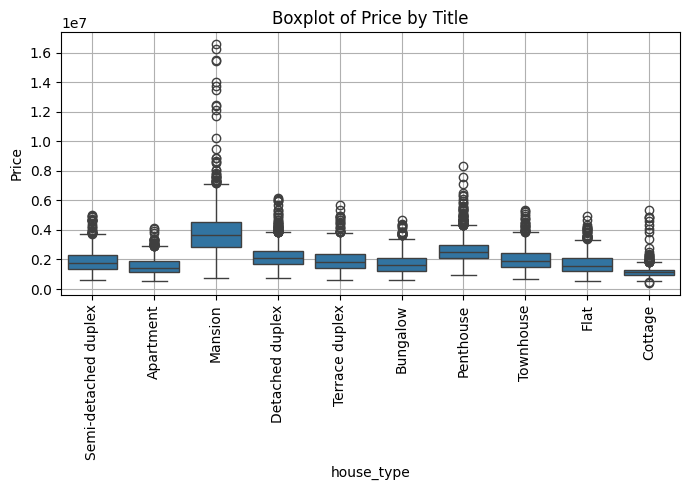

In [38]:
# Create the boxplot to check for outliers in each title value
plt.figure(figsize=(7, 5))
sns.boxplot(x='house_type', y='price', data=df_clean)


# Customize the plot
plt.title("Boxplot of Price by Title")
plt.xlabel("house_type")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

The plot visualizes the distribution of house prices across different house types, highlighting the presence of outliers. Outliers are represented as points that fall outside the whiskers of each box, indicating properties with prices significantly higher than the typical range for their category.

From the plot, it is evident that luxury house types such as Mansions and Penthouses exhibit the most pronounced price outliers, with several properties priced far above the median. Other house types, including Detached Duplexes and Terrace Duplexes, also show some high-value outliers, though to a lesser extent. More affordable house types like Flats, Apartments, and Cottages generally have fewer and less extreme outliers, reflecting a narrower price range.

Overall, the plot demonstrates that while most house types have a relatively consistent price distribution, luxury properties are more likely to have extreme high-value outliers, contributing to the upper end of the market.



**Investigating the outliers**

The goal of this step is to select the top 5% of house prices in the dataset and display statistical information on them.

In [39]:
percentile = df_clean["price"].quantile(0.95)
outlier_df = df_clean[df_clean["price"]  > percentile]
outlier_df.describe(include="all")

,ID,location,house_type,no_of_bedrooms,no_of_bathrooms,parking_space,price
count,700,700,700,700.000000,700.000000,700.000000,7.000000e+02
unique,696,36,9,NaN,NaN,NaN,NaN
top,3122,Lagos,Mansion,NaN,NaN,NaN,NaN
freq,2,136,537,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,6.498571,3.845714,3.461429,5.257966e+06
std,NaN,NaN,NaN,2.303508,2.127327,1.734097,1.437432e+06
min,NaN,NaN,NaN,1.000000,1.000000,1.000000,4.169674e+06
25%,NaN,NaN,NaN,5.000000,2.000000,2.000000,4.487128e+06
50%,NaN,NaN,NaN,7.000000,4.000000,3.000000,4.866242e+06
75%,NaN,NaN,NaN,9.000000,6.000000,5.000000,5.520949e+06


Overall,there were 700 houses that falls within the extreme high price region. Further investigations were carried out.

In [40]:
outlier_df.house_type.value_counts()

house_type
Mansion                 537
Penthouse                72
Detached duplex          29
Townhouse                17
Semi-detached duplex     14
Terrace duplex           14
Cottage                   6
Bungalow                  6
Flat                      5
Name: count, dtype: int64

Investigating the cottages to infer what might be the cause of the high price

In [41]:
outlier_df[outlier_df["house_type"].isin(["Cottage"])]

,ID,location,house_type,no_of_bedrooms,no_of_bathrooms,parking_space,price
index,,,,,,,
1738,1050,Lagos,Cottage,5,1,2,5359255.239
2001,487,Lagos,Cottage,4,1,2,4639239.258
2555,3774,Lagos,Cottage,2,2,3,4338360.593
11188,2681,Lagos,Cottage,4,2,2,4820875.479
11464,2428,Lagos,Cottage,4,2,2,4863928.203
12466,3188,Lagos,Cottage,4,1,2,4851586.158


It shows that the only reason this cottages had high price were because they were located in Lagos

This outliers were left because most of them were found in lagos. 

In [42]:
#saving the clean dataframe
df_clean.to_csv(r"Wazobia_cleaned.csv", index=False)

#### Highlighting Anomalies found in the Dataset

1. **Unusual Bedroom-Bathroom Combinations in Different Houses Types:**  
    There were numerous cases, especially among Mansions and Penthouses, where the number of bedrooms is very high (8 or 9), but the number of bathrooms <br>is unusually low (1 or 2). This is inconsistent with typical luxury property standards, where a higher number of bathrooms is expected.

2. **Unusual Bathrom-Bedroom Combination:**  
    A significant number of records have more bathrooms than bedrooms, or a difference greater than 6 between the two. This pattern suggests that an error exist in those cases.

3. **Duplicated or Highly Similar Records:**  
    Although duplicates were checked considering the entire columns, but excluding the ID, some duplicates were seen. It is possible that some records are not exact duplicates but are highly similar (e.g., same price, house type, no of bedrooms and no of bathrooms). These should be reviewed for potential redundancy or data entry errors.

**Recommendation:**  
A thorough review of the above anomalies is advised, especially for luxury properties and outlier price points. Cross-checking with the data source or original listings may help clarify whether these are genuine cases or data quality issues.


##### **Anomaly Column**

To indicate this column, a custom logic was defined to detect "suspicious" or "anomalous" entries using a function. These include unrealistic bedroom-to-bathroom ratios, parking space inconsistencies, and unusually high prices for certain house types. <br>A new column called anomaly_house was created to flag these rows.

In [43]:
# Define anomaly conditions for each row
def detect_anomaly(row):
    bedrooms = row["no_of_bedrooms"]
    bathrooms = row["no_of_bathrooms"]
    house_type = row["house_type"].lower()
    value = row["price"]

    condition1 = abs(bedrooms - bathrooms) > 5
    condition2 = (bathrooms - bedrooms) > 3

    return condition1 or condition2


# Apply anomaly detection to df_clean
df_clean_anomaly = df_clean.copy()
df_clean_anomaly['anomaly_house'] = df_clean_anomaly.apply(detect_anomaly, axis=1)

#flag duplicates excluding ID
duplicate_index = df_clean_anomaly[df_clean_anomaly.drop(columns=['ID']).duplicated(keep=False)].sort_values(by=["location","house_type", "no_of_bedrooms"]).index
df_clean_anomaly.loc[duplicate_index, 'anomaly_house'] = True

In [44]:
df_clean_anomaly['anomaly_house'].value_counts()

anomaly_house
False    11899
True      2101
Name: count, dtype: int64

In [45]:
df_clean_anomaly = df_clean[df_clean_anomaly['anomaly_house'] == True].reset_index()

#saving the anomaly dataframe
df_clean_anomaly.to_csv(r"Wazobia_cleaned_anomaly.csv", index=False)

### **MODEL DEVELOPMENT**

### **Let’s start with Step 1: Import Required Libraries.**

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder

### **Step 2: Load dataset**

In [47]:
#read dataset
data = pd.read_csv(r"Wazobia_cleaned.csv")
data.head()

,ID,location,house_type,no_of_bedrooms,no_of_bathrooms,parking_space,price
0,3583,Katsina,Semi-detached duplex,2,2,1,1149999.565
1,2748,Ondo,Apartment,5,2,4,1672416.689
2,9261,Ekiti,Mansion,7,5,4,3364799.814
3,2224,Anambra,Detached duplex,5,2,4,2410306.756
4,10300,Kogi,Terrace duplex,8,5,6,2600700.898


### **Step 3: Addressing Outliers 🥲**

Before diving deeper into the modeling process, a critical issue was addressed — **outliers**.

The dataset contained a significant number of extreme values that posed a challenge for the model. Since the model is strictly a **Linear Regression** model, 
<br>outliers can be particularly problematic because:

- ⚠️ They **distort model parameters**, making the line of best fit less reliable.
- 📉 They **skew predictions**, reducing the model’s ability to generalize.
- 🔍 They can **mask true relationships** between variables, leading to incorrect interpretations.

To minimize their negative impact, an **outlier removal strategy** technique was applied:

- The data was filtered to separate rows with prices below the **5th percentile (0.05 quantile)** and above the **95th percentile (0.95 quantile)**.
- This helped retain the majority of the dataset while eliminating only the most extreme values.

By removing these few but influential outliers, it ensured the **stability and accuracy** of the regression model without losing valuable patterns in the data.


In [48]:
binned_df = {}

data = data.reset_index()

house_types = list(data.house_type.unique())

for house_type in house_types:
  binned_df[house_type] = data[data["house_type"] == house_type]


cleaned_binned_df = {}
for k, v in binned_df.items():
  upper = v["price"].quantile(0.95)
  lower = v["price"].quantile(0.05)

  v = v[v["price"] > lower]
  v = v[v["price"] < upper]




  cleaned_binned_df[k] = v

  
data = pd.concat(cleaned_binned_df.values(), ignore_index=True).sort_values(by='index')
data.set_index('index', inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12588 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               12588 non-null  int64  
 1   location         12588 non-null  object 
 2   house_type       12588 non-null  object 
 3   no_of_bedrooms   12588 non-null  int64  
 4   no_of_bathrooms  12588 non-null  int64  
 5   parking_space    12588 non-null  int64  
 6   price            12588 non-null  float64
dtypes: float64(1), int64(4), object(2)
memory usage: 786.8+ KB


### **Step 4: Features Assigning**

#### **✅ What we did was:**
- Dropped `ID`, which has no predictive value

- Splits the data into `X` (features) and `y` (target = price)


In [49]:
# Drop the ID column
df = data.drop(columns=["ID"])

# Separate features (X) and target (y)
X = df.drop(columns=["price"])
y = df[["price"]]

print(X.shape, y.shape)

(12588, 5) (12588, 1)


### **Step 5: 📊 Train-Test Split**

The dataset was divided into **training (70%)** and **testing (30%)** sets using a fixed random seed (`random_state=40`) to ensure **reproducibility** of results. <br>This approach is fundamental in machine learning for several reasons:

- **Model Evaluation**: By testing on unseen data, we obtain a more realistic estimate of how the model will perform in real-world scenarios.
- **Avoiding Overfitting**: It helps prevent the model from simply memorizing the training data by providing a separate validation step.

This structured splitting strategy lays a strong foundation for building a robust and generalizable machine learning model.


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
print(X_train.shape, X_test.shape)

(8811, 5) (3777, 5)


### **Step 6: 💡 Features Engineering**

### 🧠 Feature Encoding & Engineering: The Brainstorming Phase

This is where the real brainstorming began!

Initially, various **feature encoding techniques** were explored to find the one suitable for the dataset. Given the **quasi-ordinal nature** of some variables (based on real-world interpretations), **Ordinal Encoding** or **Target Encoding** seemed like viable options.

However, after testing multiple approaches, it was discovered that the model **performed best with One-Hot Encoding**. Despite being more memory-intensive, it allowed the model to learn more effectively from the categorical variables — particularly the **price-based target variable**, which didn’t align well with ordinal assumptions.

---

### 🔧 Feature Engineering Strategy

After settling on One-Hot Encoding, the main focus was then turned to **enhancing model performance** through thoughtful feature engineering. Based on observed relationships between some features and the target variable (price), some few new features were created:

1. **Bedrooms × House Type**  
   - Combined the number of bedrooms with the type of house.

2. **Parking Space × House Type**  
   - Merged parking space availability with house type, based on the our discovery that certain house types with more parking space increase in value.

3. **Bedrooms + Bathrooms**  
   - Created a new feature by concatenating the number of bedrooms and bathrooms.

4. **One-Hot Encoding on Engineered Features + Location**  
   - Applied One-Hot Encoding to all the newly created features, as well as the `Location` column, to ensure the model could interpret them effectively.

---

These engineered features were informed by the exploratory data analysis that was done earlier in the data cleaning phase, where it was observed that some meaningful correlations existed between these combinations and the target variable (**price**). By feeding these new features into the model, it was able to **boost predictive performance** and help the model better capture the underlying patterns in the data.


In [51]:
X_train["bed_house_type"] = X_train["no_of_bedrooms"].astype(str) + "_" +  X_train["house_type"]
X_train["ps_house_type"] = X_train["parking_space"].astype(str) + "_" +  X_train["house_type"]
X_train["bed_bath_room"] = X_train["no_of_bedrooms"].astype(str) + "_bed_" +  X_train["no_of_bathrooms"].astype(str) +"_bath_rooms"


# One-Hot Encode categorical variables: house_type and location
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# Fit on training categorical columns
X_train_cat = encoder.fit_transform(X_train[['location', "bed_house_type", "ps_house_type", "bed_bath_room"]])


# Get column names for encoded features
encoded_columns = encoder.get_feature_names_out(['location', "bed_house_type", "ps_house_type", "bed_bath_room"])

# Convert to DataFrame
X_train_final = pd.DataFrame(X_train_cat, columns=encoded_columns, index=X_train.index)
X_train_final

,location_Adamawa,location_Akwa Ibom,location_Anambra,location_Bauchi,location_Bayelsa,location_Benue,location_Borno,location_Cross River,location_Delta,location_Ebonyi,...,bed_bath_room_8_bed_5_bath_rooms,bed_bath_room_8_bed_6_bath_rooms,bed_bath_room_8_bed_7_bath_rooms,bed_bath_room_9_bed_1_bath_rooms,bed_bath_room_9_bed_2_bath_rooms,bed_bath_room_9_bed_3_bath_rooms,bed_bath_room_9_bed_4_bath_rooms,bed_bath_room_9_bed_5_bath_rooms,bed_bath_room_9_bed_6_bath_rooms,bed_bath_room_9_bed_7_bath_rooms
index,,,,,,,,,,,,,,,,,,,,,
9072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8210,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5470,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12810,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### **Step 7: 🧪 Model Training**

To fine-tune our model, we used **Grid Search** with **5-fold Cross-Validation**. This allowed us to test different hyperparameter combinations and <br>choose the best setup based on performance.

#### 🔧 Parameters Tuned
- `fit_intercept`: Whether to calculate the intercept.
- `positive`: Whether to restrict coefficients to non-negative values.

#### 📊 Evaluation Metric
Each configuration were evaluated using **Mean Squared Error (MSE)** and the selected model is the one with the lowest **Root Mean Squared Error (RMSE)**.

The resulting model (`best_model`) was both efficient and generalizable.


In [52]:
model = LinearRegression()
param_grid = {'fit_intercept': [True, False],
              'copy_X': [True, False],
              "positive": [True, False],
              'n_jobs': [1, -1]}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring="neg_mean_squared_error")
grid_search.fit(X_train_final, y_train)
(-grid_search.best_score_)**0.5

np.float64(338922.3356737608)

### **Step 8: 📈 Model Evaluation**

The same feature transformations from the training phase were applied to the test set, using the trained encoder for One-Hot Encoding.

Predictions were made on `X_test_final`, and model performance was evaluated using **Root Mean Squared Error (RMSE)** to measure prediction accuracy on unseen data.


In [53]:
X_test["bed_house_type"] = X_test["no_of_bedrooms"].astype(str) + "_" +  X_test["house_type"]
X_test["ps_house_type"] = X_test["parking_space"].astype(str) + "_" +  X_test["house_type"]
X_test["bed_bath_room"] = X_test["no_of_bedrooms"].astype(str) + "_bed_" +  X_test["no_of_bathrooms"].astype(str) +"_bath_rooms"

X_test_cat = encoder.transform(X_test[['location', "bed_house_type", "ps_house_type", "bed_bath_room"]])
X_test_final = pd.DataFrame(X_test_cat, columns=encoded_columns, index=X_test.index)
X_test_final

,location_Adamawa,location_Akwa Ibom,location_Anambra,location_Bauchi,location_Bayelsa,location_Benue,location_Borno,location_Cross River,location_Delta,location_Ebonyi,...,bed_bath_room_8_bed_5_bath_rooms,bed_bath_room_8_bed_6_bath_rooms,bed_bath_room_8_bed_7_bath_rooms,bed_bath_room_9_bed_1_bath_rooms,bed_bath_room_9_bed_2_bath_rooms,bed_bath_room_9_bed_3_bath_rooms,bed_bath_room_9_bed_4_bath_rooms,bed_bath_room_9_bed_5_bath_rooms,bed_bath_room_9_bed_6_bath_rooms,bed_bath_room_9_bed_7_bath_rooms
index,,,,,,,,,,,,,,,,,,,,,
12661,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2280,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9037,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10976,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test_final)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

RMSE: 348365.3972237201


In [90]:
y_pred = pd.DataFrame(y_pred, columns=["price"], index=X_test.index)

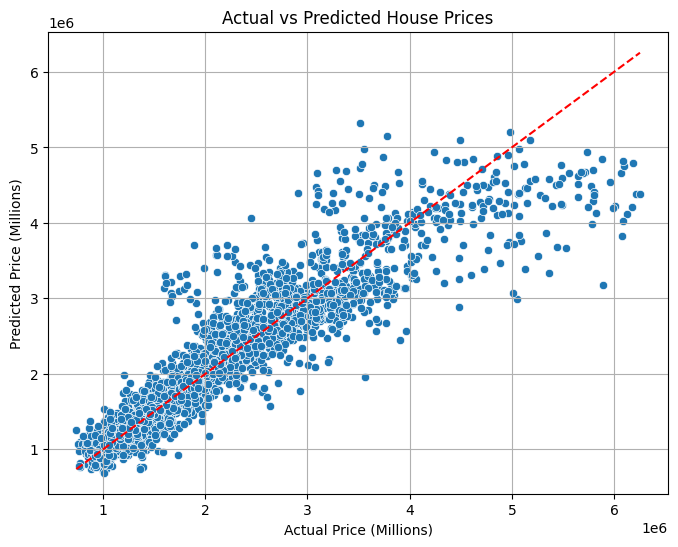

In [89]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test['price'], y=y_pred["price"])
plt.xlabel("Actual Price (Millions)")
plt.ylabel("Predicted Price (Millions)")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.show()

✅ Interpretation:
If the points fall close to the red dashed line, the predictions are very accurate.

The closer they are to the line, the lower the RMSE.

#### **✅ Conclusion**<br>

The linear regression model achieved a test RMSE of approximately **₦348,365**, meaning predictions were off by about **₦0.35 million** on average. Given that typical house prices are in the multi-million Naira range, this error is relatively modest.

For comparison, the cross-validated RMSE during training was around **₦338,922**. The closeness of these values suggests the model **generalizes well** and is not overfitting.

Overall, this model provides a solid **baseline** — it’s accurate, interpretable, and fully reproducible. Future improvements could involve trying **non-linear models** or engineering additional features to further reduce prediction error.
